In [ ]:
# ML final

In [6]:
import numpy as np
import random
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from enum import Enum

class Road:
    def __init__(self, name, distance):
        self.name = name
        self.distance = distance
        self.pheromone_level = 0.0
        self.traffic_density = 0.0  

def setup_fuzzy_logic():
    pheromone = ctrl.Antecedent(np.arange(0, 13, 1), 'pheromone')
    distance = ctrl.Antecedent(np.arange(0, 15, 1), 'distance')
    path_preference = ctrl.Consequent(np.arange(0, 101, 1), 'path_preference')

    pheromone['low'] = fuzz.trimf(pheromone.universe, [0, 0, 6])
    pheromone['medium'] = fuzz.trimf(pheromone.universe, [5, 8, 11])
    pheromone['high'] = fuzz.trimf(pheromone.universe, [10, 12, 12])

    distance['short'] = fuzz.trimf(distance.universe, [0, 0, 7])
    distance['medium'] = fuzz.trimf(distance.universe, [6, 7, 11])
    distance['long'] = fuzz.trimf(distance.universe, [10, 12, 15])

    path_preference['low'] = fuzz.trimf(path_preference.universe, [0, 0, 50])
    path_preference['medium'] = fuzz.trimf(path_preference.universe, [30, 50, 70])
    path_preference['high'] = fuzz.trimf(path_preference.universe, [50, 100, 100])

    rule1 = ctrl.Rule(pheromone['low'] & distance['short'], path_preference['high'])
    rule2 = ctrl.Rule(pheromone['medium'] & distance['medium'], path_preference['medium'])
    rule3 = ctrl.Rule(pheromone['high'] & distance['long'], path_preference['low'])
    rule4 = ctrl.Rule(pheromone['high'] & distance['short'], path_preference['medium'])
    rule5 = ctrl.Rule(pheromone['low'] & distance['long'], path_preference['medium'])
    rule6 = ctrl.Rule(pheromone['medium'] & distance['short'], path_preference['high'])
    rule7 = ctrl.Rule(pheromone['medium'] & distance['long'], path_preference['low'])
    rule8 = ctrl.Rule(pheromone['low'] & distance['medium'], path_preference['high'])
    
    path_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
    path_sim = ctrl.ControlSystemSimulation(path_ctrl)

    return path_sim

roads = [Road("Path 1", 5.6), Road("Path 2", 7.4), Road("Path 3", 5.2)]

pher_thresh = 12  
decay_rate = 0.1  

def fuzzy_decision(road, path_sim):
    path_sim.input['pheromone'] = road.pheromone_level
    path_sim.input['distance'] = road.distance

    desirability = 0  

    try:
        path_sim.compute()
        desirability = path_sim.output['path_preference']
        print(f"Desirability for {road.name}: {desirability:.2f}")  # Debugging output
    except KeyError:
        print(f"{road.name} is not preferable here...")

    return desirability

def select_road(roads, path_sim):
    desirability_scores = [fuzzy_decision(road, path_sim) for road in roads]
    total_score = sum(desirability_scores)
    
    probabilities = [score / total_score if total_score > 0 else 0 for score in desirability_scores]
    
    selected_road = np.random.choice(roads, p=probabilities)
    
    return selected_road

def update_pheromones(selected_road, roads, pheromone_increase=1, decay_rate=0.1):
    selected_road.pheromone_level += pheromone_increase
    
    for road in roads:
        road.pheromone_level = max(0, road.pheromone_level * (1 - decay_rate))  # Ensure non-negative

def run_simulation(roads, episodes=50):
    path_sim = setup_fuzzy_logic()  
    for _ in range(episodes):
        selected_road = select_road(roads, path_sim)
        update_pheromones(selected_road, roads)
        print(f"Selected: {selected_road.name}, Pheromone Level: {selected_road.pheromone_level:.2f}")

run_simulation(roads)


Desirability for Path 1: 77.41
Desirability for Path 2: 83.18
Desirability for Path 3: 78.06
Selected: Path 2, Pheromone Level: 0.90
Desirability for Path 1: 77.41
Desirability for Path 2: 83.01
Desirability for Path 3: 78.06
Selected: Path 2, Pheromone Level: 1.71
Desirability for Path 1: 77.41
Desirability for Path 2: 82.28
Desirability for Path 3: 78.06
Selected: Path 1, Pheromone Level: 0.90
Desirability for Path 1: 77.41
Desirability for Path 2: 82.46
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 0.90
Desirability for Path 1: 77.41
Desirability for Path 2: 82.61
Desirability for Path 3: 78.06
Selected: Path 2, Pheromone Level: 2.15
Desirability for Path 1: 77.41
Desirability for Path 2: 81.76
Desirability for Path 3: 78.06
Selected: Path 2, Pheromone Level: 2.83
Desirability for Path 1: 77.41
Desirability for Path 2: 80.81
Desirability for Path 3: 78.06
Selected: Path 1, Pheromone Level: 1.49
Desirability for Path 1: 77.41
Desirability for Path 2: 81.22
Desirab

In [ ]:
# with visualization

Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 0.90
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 1, Pheromone Level: 0.90
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 1, Pheromone Level: 1.71
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 2, Pheromone Level: 0.90
Desirability for Path 1: 77.41
Desirability for Path 2: 68.82
Desirability for Path 3: 78.06
Selected: Path 1, Pheromone Level: 2.29
Desirability for Path 1: 77.41
Desirability for Path 2: 68.85
Desirability for Path 3: 78.06
Selected: Path 2, Pheromone Level: 1.63
Desirability for Path 1: 77.41
Desirability for Path 2: 68.46
Desirability for Path 3: 78.06
Selected: Path 2, Pheromone Level: 2.37
Desirability for Path 1: 77.41
Desirability for Path 2: 67.98
Desirab

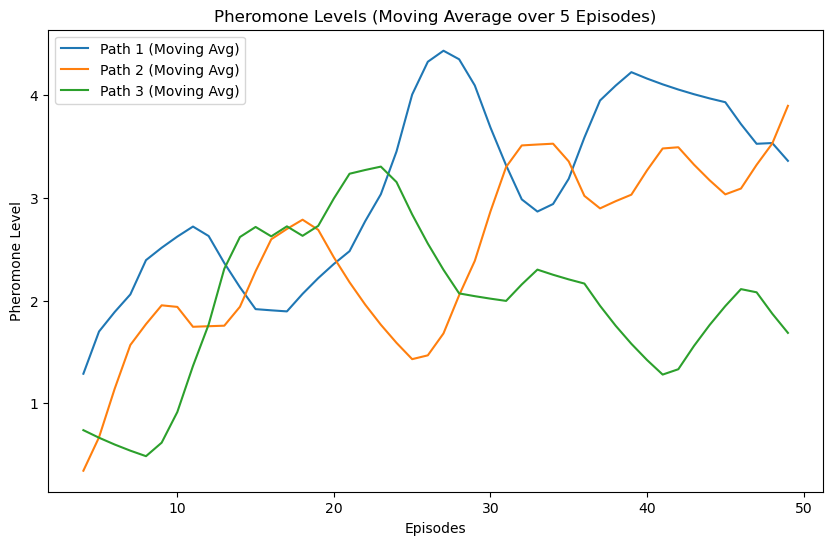

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import skfuzzy as fuzz
from skfuzzy import control as ctrl

class Road:
    def __init__(self, name, distance):
        self.name = name
        self.distance = distance
        self.pheromone_level = 0.0
        self.traffic_density = 0.0  

def setup_fuzzy_logic():
    pheromone = ctrl.Antecedent(np.arange(0, 13, 1), 'pheromone')
    distance = ctrl.Antecedent(np.arange(0, 15, 1), 'distance')
    path_preference = ctrl.Consequent(np.arange(0, 101, 1), 'path_preference')

    pheromone['low'] = fuzz.trimf(pheromone.universe, [0, 0, 6])
    pheromone['medium'] = fuzz.trimf(pheromone.universe, [5, 8, 11])
    pheromone['high'] = fuzz.trimf(pheromone.universe, [10, 12, 12])

    distance['short'] = fuzz.trimf(distance.universe, [0, 0, 7])
    distance['medium'] = fuzz.trimf(distance.universe, [6, 7, 11])
    distance['long'] = fuzz.trimf(distance.universe, [10, 12, 15])

    path_preference['low'] = fuzz.trimf(path_preference.universe, [0, 0, 50])
    path_preference['medium'] = fuzz.trimf(path_preference.universe, [30, 50, 70])
    path_preference['high'] = fuzz.trimf(path_preference.universe, [50, 100, 100])

    rule1 = ctrl.Rule(pheromone['low'] & distance['short'], path_preference['high'])
    rule2 = ctrl.Rule(pheromone['medium'] & distance['medium'], path_preference['medium'])
    rule3 = ctrl.Rule(pheromone['high'] & distance['long'], path_preference['low'])
    rule4 = ctrl.Rule(pheromone['high'] & distance['short'], path_preference['medium'])
    rule5 = ctrl.Rule(pheromone['low'] & distance['long'], path_preference['medium'])
    rule6 = ctrl.Rule(pheromone['medium'] & distance['short'], path_preference['high'])
    rule7 = ctrl.Rule(pheromone['medium'] & distance['long'], path_preference['low'])
    rule8 = ctrl.Rule(pheromone['low'] & distance['medium'], path_preference['high'])
    rule9 = ctrl.Rule(pheromone['high'] & (distance['short'] | distance['medium']), path_preference['low'])
    rule10 = ctrl.Rule(pheromone['low'] & (distance['medium'] | distance['long']), path_preference['medium'])
    rule11 = ctrl.Rule(pheromone['medium'] & distance['short'], path_preference['medium'])
    rule12 = ctrl.Rule(pheromone['medium'] & distance['long'], path_preference['medium'])
    rule13 = ctrl.Rule(pheromone['low'] & distance['long'], path_preference['high'])
    rule14 = ctrl.Rule(pheromone['high'] & distance['short'], path_preference['medium'])

   
    path_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10, rule11, rule12, rule13, rule14])
    path_sim = ctrl.ControlSystemSimulation(path_ctrl)

    return path_sim

def fuzzy_decision(road, path_sim):
    path_sim.input['pheromone'] = road.pheromone_level
    path_sim.input['distance'] = road.distance

    desirability = 0  
    try:
        path_sim.compute()
        desirability = path_sim.output['path_preference']
        print(f"Desirability for {road.name}: {desirability:.2f}")  
    except KeyError:
        print(f"{road.name} is not preferable here...")

    return desirability

def select_road(roads, path_sim):
    desirability_scores = [fuzzy_decision(road, path_sim) for road in roads]
    total_score = sum(desirability_scores)
    probabilities = [score / total_score if total_score > 0 else 0 for score in desirability_scores]
    selected_road = np.random.choice(roads, p=probabilities)
    return selected_road

def update_pheromones(selected_road, roads, pheromone_increase=1, decay_rate=0.1):
    selected_road.pheromone_level += pheromone_increase
    for road in roads:
        road.pheromone_level = max(0, road.pheromone_level * (1 - decay_rate))

# Moving Average Visualization function
def moving_average_visualization(roads, episodes=50, window=5):
    path_sim = setup_fuzzy_logic()
    pheromone_data = {road.name: [] for road in roads}

    # Run simulation and collect pheromone levels
    for episode in range(episodes):
        selected_road = select_road(roads, path_sim)
        update_pheromones(selected_road, roads)
        print(f"Selected: {selected_road.name}, Pheromone Level: {selected_road.pheromone_level:.2f}")
        for road in roads:
            pheromone_data[road.name].append(road.pheromone_level)

    # Calculate moving averages and plot
    plt.figure(figsize=(10, 6))
    for road_name, levels in pheromone_data.items():
        if len(levels) >= window:
            moving_avg = np.convolve(levels, np.ones(window) / window, mode='valid')
            plt.plot(range(window-1, episodes), moving_avg, label=f"{road_name} (Moving Avg)")

    plt.xlabel("Episodes")
    plt.ylabel("Pheromone Level")
    plt.title(f"Pheromone Levels (Moving Average over {window} Episodes)")
    plt.legend()
    plt.show()

# Define roads and run visualization
roads = [Road("Path 1", 5.6), Road("Path 2", 7.4), Road("Path 3", 5.2)]
moving_average_visualization(roads)

Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 0.90
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 1.71
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 2.44
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 3.10
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 3.69
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 4.22
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirability for Path 3: 78.06
Selected: Path 3, Pheromone Level: 4.70
Desirability for Path 1: 77.41
Desirability for Path 2: 68.91
Desirab

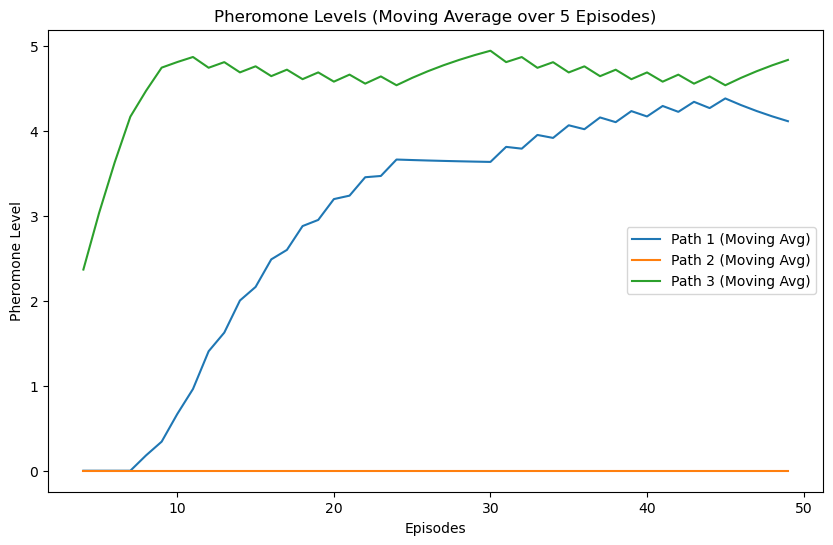

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import skfuzzy as fuzz
from skfuzzy import control as ctrl

class Road:
    def __init__(self, name, distance):
        self.name = name
        self.distance = distance
        self.pheromone_level = 0.0
        self.traffic_density = 0.0  

def setup_fuzzy_logic():
    pheromone = ctrl.Antecedent(np.arange(0, 13, 1), 'pheromone')
    distance = ctrl.Antecedent(np.arange(0, 15, 1), 'distance')
    path_preference = ctrl.Consequent(np.arange(0, 101, 1), 'path_preference')

    pheromone['low'] = fuzz.trimf(pheromone.universe, [0, 0, 6])
    pheromone['medium'] = fuzz.trimf(pheromone.universe, [5, 8, 11])
    pheromone['high'] = fuzz.trimf(pheromone.universe, [10, 12, 12])

    distance['short'] = fuzz.trimf(distance.universe, [0, 0, 7])
    distance['medium'] = fuzz.trimf(distance.universe, [6, 7, 11])
    distance['long'] = fuzz.trimf(distance.universe, [10, 12, 15])

    path_preference['low'] = fuzz.trimf(path_preference.universe, [0, 0, 50])
    path_preference['medium'] = fuzz.trimf(path_preference.universe, [30, 50, 70])
    path_preference['high'] = fuzz.trimf(path_preference.universe, [50, 100, 100])

    rule1 = ctrl.Rule(pheromone['low'] & distance['short'], path_preference['high'])
    rule2 = ctrl.Rule(pheromone['medium'] & distance['medium'], path_preference['medium'])
    rule3 = ctrl.Rule(pheromone['high'] & distance['long'], path_preference['low'])
    rule4 = ctrl.Rule(pheromone['high'] & distance['short'], path_preference['medium'])
    rule5 = ctrl.Rule(pheromone['low'] & distance['long'], path_preference['medium'])
    rule6 = ctrl.Rule(pheromone['medium'] & distance['short'], path_preference['high'])
    rule7 = ctrl.Rule(pheromone['medium'] & distance['long'], path_preference['low'])
    rule8 = ctrl.Rule(pheromone['low'] & distance['medium'], path_preference['high'])
    rule9 = ctrl.Rule(pheromone['high'] & (distance['short'] | distance['medium']), path_preference['low'])
    rule10 = ctrl.Rule(pheromone['low'] & (distance['medium'] | distance['long']), path_preference['medium'])
    rule11 = ctrl.Rule(pheromone['medium'] & distance['short'], path_preference['medium'])
    rule12 = ctrl.Rule(pheromone['medium'] & distance['long'], path_preference['medium'])
    rule13 = ctrl.Rule(pheromone['low'] & distance['long'], path_preference['high'])
    rule14 = ctrl.Rule(pheromone['high'] & distance['short'], path_preference['medium'])

    path_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10, rule11, rule12, rule13, rule14])
    path_sim = ctrl.ControlSystemSimulation(path_ctrl)

    return path_sim

def fuzzy_decision(road, path_sim):
    path_sim.input['pheromone'] = road.pheromone_level
    path_sim.input['distance'] = road.distance

    desirability = 0  
    try:
        path_sim.compute()
        desirability = path_sim.output['path_preference']
        print(f"Desirability for {road.name}: {desirability:.2f}")  # Debugging output
    except KeyError:
        print(f"{road.name} is not preferable here...")

    return desirability

def select_road(roads, path_sim):
    desirability_scores = [fuzzy_decision(road, path_sim) for road in roads]
    max_index = desirability_scores.index(max(desirability_scores))
    selected_road = roads[max_index]
    return selected_road

def update_pheromones(selected_road, roads, pheromone_increase=1, decay_rate=0.1):
    selected_road.pheromone_level += pheromone_increase
    for road in roads:
        road.pheromone_level = max(0, road.pheromone_level * (1 - decay_rate))

# Moving Average Visualization function
def moving_average_visualization(roads, episodes=50, window=5):
    path_sim = setup_fuzzy_logic()
    pheromone_data = {road.name: [] for road in roads}

    # Run simulation and collect pheromone levels
    for episode in range(episodes):
        selected_road = select_road(roads, path_sim)
        update_pheromones(selected_road, roads)
        print(f"Selected: {selected_road.name}, Pheromone Level: {selected_road.pheromone_level:.2f}")
        for road in roads:
            pheromone_data[road.name].append(road.pheromone_level)

    # Calculate moving averages and plot
    plt.figure(figsize=(10, 6))
    for road_name, levels in pheromone_data.items():
        if len(levels) >= window:
            moving_avg = np.convolve(levels, np.ones(window) / window, mode='valid')
            plt.plot(range(window-1, episodes), moving_avg, label=f"{road_name} (Moving Avg)")

    plt.xlabel("Episodes")
    plt.ylabel("Pheromone Level")
    plt.title(f"Pheromone Levels (Moving Average over {window} Episodes)")
    plt.legend()
    plt.show()

# Define roads and run visualization
roads = [Road("Path 1", 5.6), Road("Path 2", 7.4), Road("Path 3", 5.2)]
moving_average_visualization(roads)


In [ ]:
# Code Snippet (Randomized Selection):
def select_road(roads, path_sim):
    desirability_scores = [fuzzy_decision(road, path_sim) for road in roads]
    total_score = sum(desirability_scores)
    probabilities = [score / total_score if total_score > 0 else 0 for score in desirability_scores]
    selected_road = np.random.choice(roads, p=probabilities)
    return selected_road


In [ ]:
def select_road(roads, path_sim):
    desirability_scores = [fuzzy_decision(road, path_sim) for road in roads]
    max_index = desirability_scores.index(max(desirability_scores))
    selected_road = roads[max_index]
    return selected_road
